In [1]:
##import libraries##
import numpy as np
import matplotlib.pyplot as plt
import tifffile as tiff
import healpy as hp

In [2]:
##Read the tif file##
image = tiff.imread('/media/sf_Shared_Ubuntu/MAPS/gpw_v4_population_density_adjusted_to_2015_unwpp_country_totals_rev11_2020_15_min.tif')
image_array = np.array(image)

In [3]:
# Define the spherical coordinates#
theta = np.linspace(np.radians(0), np.radians(180), num=image_array.shape[0])
phi = np.linspace(-np.radians(180), np.radians(180), num=image_array.shape[1])

# Set angular resolution#
nside = 16

## Make empty healpix mask and pixel values vector##
healpix_map = np.zeros(hp.nside2npix(nside), dtype=np.double)
pixel_counts = np.zeros(hp.nside2npix(nside), dtype=int)


<IPython.core.display.Javascript object>


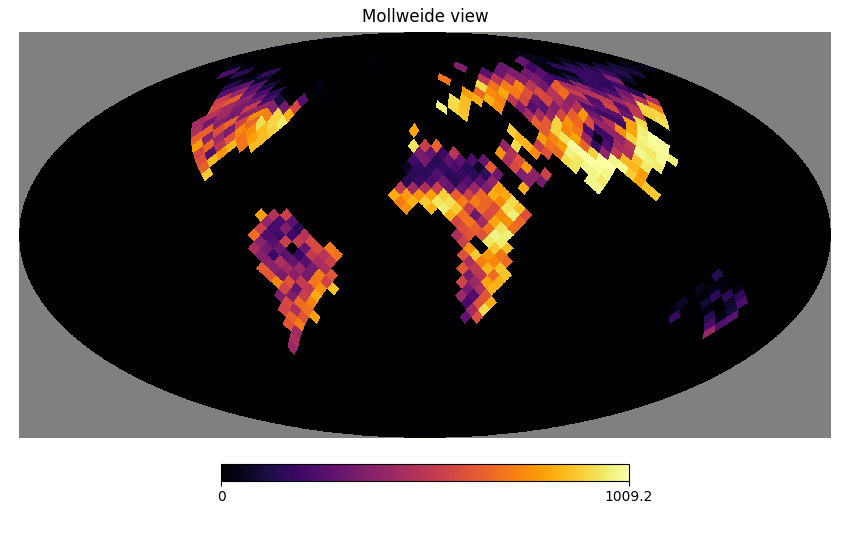

[6003 5999 6023 ... 5999 6023 6003]


In [4]:
for i in range(len(theta)):
    for j in range(len(phi)):
        pixel = hp.ang2pix(nside, theta[i], phi[j])
        healpix_map[pixel] += image_array[i, j]
        pixel_counts[pixel] += 1

# Average value of each pixel#
healpix_map[pixel_counts>0 ] /= pixel_counts[pixel_counts>0 ]

%matplotlib notebook
hp.mollview(healpix_map, cmap="inferno", xsize=3000, flip="geo", norm="hist", min=0)
plt.show()
print(pixel_counts)